In [1]:
import pandas as pd

In [2]:
df = pd.read_csv (r'C:\Users\j_bia\Documents\projects\FixedIncomeDashboardCreation\PHreferencerates.csv')
df.set_index("DATE",inplace=True)
df.tail()

,1M,3M,6M,1Y,2Y,3Y,4Y,5Y,7Y,10Y,20Y,25Y
DATE,,,,,,,,,,,,
8/19/2020,1.112,1.203,1.450,1.786,2.046,2.174,2.287,2.392,2.563,2.641,3.531,3.595
8/20/2020,1.111,1.191,1.437,1.787,2.012,2.150,2.273,2.389,2.571,2.639,3.578,3.653
8/24/2020,1.118,1.188,1.443,1.787,2.035,2.174,2.288,2.392,2.579,2.689,3.587,3.654
8/25/2020,1.119,1.191,1.431,1.785,2.036,2.160,2.273,2.380,2.561,2.684,3.614,3.668
8/26/2020,1.120,1.194,1.429,1.790,2.072,2.224,2.364,2.490,2.659,2.785,3.484,3.654


In [3]:
df.describe()

,1M,3M,6M,1Y,2Y,3Y,4Y,5Y,7Y,10Y,20Y
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,2.873241,2.797065,3.112193,3.418336,4.019092,4.341340,4.694220,4.861673,5.256932,5.569070,6.539726
std,1.483491,1.575741,1.655581,1.679824,1.505351,1.444884,1.417502,1.445076,1.525747,1.635862,1.978830
min,0.000000,0.000900,0.064500,0.189800,1.200000,1.592600,2.236000,2.067500,2.513000,2.627000,3.227500
25%,1.676700,1.508100,1.805000,2.104975,2.621750,3.207700,3.621475,3.773775,3.965675,4.193925,5.049675
50%,2.684450,2.400000,2.815000,3.028600,3.878800,4.026400,4.354300,4.650200,4.950000,5.217600,5.751550
75%,3.961900,4.000000,4.275025,4.627250,5.000000,5.282275,5.783075,6.106075,6.662500,7.000000,8.297675
max,6.750000,7.000000,7.450000,7.750000,8.500000,8.750000,9.100000,9.500000,9.925000,10.500000,13.000000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

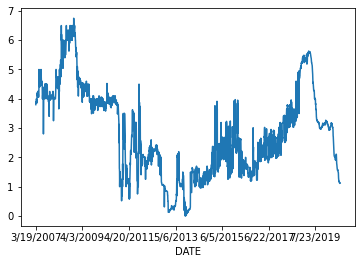

In [9]:
df['1M'].plot()

In [4]:
#Create Spreads
Spread_20Y10Y=df['20Y']-df['10Y']
Spread_10Y7Y=df['10Y']-df['7Y']
Spread_10Y5Y=df['10Y']-df['5Y']
Spread_10Y2Y=df['10Y']-df['2Y']
Spread_7Y5Y=df['7Y']-df['5Y']
Spread_7Y2Y=df['7Y']-df['2Y']
Spread_5Y2Y=df['5Y']-df['2Y']
Spread_2Y1Y=df['2Y']-df['1Y']

In [5]:
#Combine Spreads to dataframe
Spreads=pd.concat([Spread_20Y10Y,Spread_10Y7Y,Spread_10Y5Y,Spread_10Y2Y,Spread_7Y5Y,Spread_7Y2Y,Spread_5Y2Y,Spread_2Y1Y],axis=1)
#rename the columns
Spreads.columns=['20-10','10-7','10-5','10-2','7-5','7-2','5-2','2-1']
Spreads.head()

,20-10,10-7,10-5,10-2,7-5,7-2,5-2,2-1
DATE,,,,,,,,
3/19/2007,1.3000,0.5500,1.3000,1.9000,0.7500,1.3500,0.6000,0.6000
3/20/2007,1.3000,0.7000,1.3900,1.9250,0.6900,1.2250,0.5350,0.5750
3/21/2007,1.3750,0.6250,1.4100,2.2000,0.7850,1.5750,0.7900,0.2250
3/22/2007,1.3000,0.5000,1.3250,2.1500,0.8250,1.6500,0.8250,0.4500
3/23/2007,1.4572,0.4595,1.2811,1.9694,0.8216,1.5099,0.6883,0.5234


## 1 year Z-scores

In [6]:
#Get the rolling average spread
spread_ave_1year=Spreads.rolling(260).mean()[259:]
spread_ave_1year.head()

,20-10,10-7,10-5,10-2,7-5,7-2,5-2,2-1
DATE,,,,,,,,
4/14/2008,1.498937,0.320744,0.603073,1.002626,0.282328,0.681882,0.399553,0.499653
4/15/2008,1.497880,0.319270,0.599734,0.998941,0.280464,0.679671,0.399207,0.499472
4/16/2008,1.498668,0.316558,0.594488,0.994857,0.277929,0.678299,0.400370,0.497574
4/17/2008,1.495341,0.314539,0.591216,0.990738,0.276677,0.676198,0.399522,0.498136
4/18/2008,1.492668,0.312808,0.587425,0.986177,0.274617,0.673368,0.398752,0.497793


In [7]:
#Get rolling standard deviations
spread_vol_1year=Spreads.rolling(260).std()[259:]
spread_vol_1year.head()

,20-10,10-7,10-5,10-2,7-5,7-2,5-2,2-1
DATE,,,,,,,,
4/14/2008,0.285383,0.160707,0.301568,0.348265,0.221330,0.319717,0.185075,0.305258
4/15/2008,0.286630,0.160354,0.298613,0.343773,0.219408,0.317055,0.184782,0.305213
4/16/2008,0.286366,0.159851,0.296651,0.339003,0.218464,0.315454,0.186583,0.306273
4/17/2008,0.292761,0.159254,0.292281,0.330708,0.216470,0.311250,0.185302,0.305904
4/18/2008,0.297683,0.159676,0.289101,0.322739,0.213763,0.305657,0.183938,0.306009


In [8]:
# Get same size
spreads=Spreads[259:]
spreads.head()

,20-10,10-7,10-5,10-2,7-5,7-2,5-2,2-1
DATE,,,,,,,,
4/14/2008,0.925,0.3750,0.7293,0.9500,0.3543,0.5750,0.2207,0.3000
4/15/2008,1.025,0.1667,0.4320,0.9418,0.2653,0.7751,0.5098,0.5528
4/16/2008,1.505,-0.0050,0.0259,0.8633,0.0309,0.8683,0.8374,0.0817
4/17/2008,0.510,0.1000,0.5593,1.1289,0.4593,1.0289,0.5696,0.3711
4/18/2008,0.605,0.0500,0.3394,0.9642,0.2894,0.9142,0.6248,0.3608


In [9]:
# Get difference (X-mu)
diff_1year=spreads.subtract(spread_ave_1year)
# Divide by vol to get Z
spread_Z_1year=diff_1year.divide(spread_vol_1year)
spread_Z_1year.head()

,20-10,10-7,10-5,10-2,7-5,7-2,5-2,2-1
DATE,,,,,,,,
4/14/2008,-2.011110,0.337606,0.418571,-0.151110,0.325178,-0.334302,-0.966386,-0.654046
4/15/2008,-1.649789,-0.951459,-0.561712,-0.166217,-0.069114,0.300986,0.598509,0.174726
4/16/2008,0.022111,-2.011617,-1.916688,-0.388071,-1.130755,0.602310,2.342288,-1.357856
4/17/2008,-3.365681,-1.347149,-0.109196,0.417778,0.843644,1.133176,0.917843,-0.415281
4/18/2008,-2.981921,-1.645890,-0.857917,-0.068095,0.069158,0.787914,1.228936,-0.447677


## 5 year Z-scores

In [10]:
#Get the rolling average spread
spread_ave_5year=Spreads.rolling(260*5).mean()[260*5-1:]
#Get rolling standard deviations
spread_vol_5year=Spreads.rolling(260*5).std()[260*5-1:]
# Get same size
spreads_5year=Spreads[260*5-1:]

In [11]:
# Get difference (X-mu)
diff_5year=spreads_5year.subtract(spread_ave_5year)
# Divide by vol to get Z
spread_Z_5year=diff_5year.divide(spread_vol_5year)
spread_Z_5year.head()

,20-10,10-7,10-5,10-2,7-5,7-2,5-2,2-1
DATE,,,,,,,,
7/5/2012,-1.018218,-1.487481,-1.350080,0.247535,-0.715966,0.785317,1.307876,-0.551919
7/6/2012,-1.120038,-1.223913,-1.109204,0.213592,-0.586818,0.657819,1.088804,-0.497212
7/9/2012,-0.997791,-1.526177,-1.359267,0.159590,-0.698260,0.696819,1.192139,-0.654514
7/10/2012,-0.971159,-1.385160,-1.334820,0.239827,-0.775786,0.742708,1.286150,-0.545692
7/11/2012,-0.957010,-1.501548,-1.377117,0.159347,-0.743086,0.688792,1.204290,-0.388359


## Get latest Z-score

In [12]:
latest_1yr_Z=spread_Z_1year.tail(1).transpose()
latest_1yr_Z.columns=["1-year Z-score"]
latest_1yr_Z

,1-year Z-score
20-10,0.535533
10-7,-0.441274
10-5,-0.198958
10-2,0.453131
7-5,0.088635
7-2,0.799704
5-2,1.060195
2-1,0.406872


In [13]:
latest_5yr_Z=spread_Z_5year.tail(1).transpose()
latest_5yr_Z.columns=["5-year Z-score"]
latest_5yr_Z

,5-year Z-score
20-10,0.384441
10-7,-0.077886
10-5,-0.372047
10-2,-0.445925
7-5,-0.357230
7-2,-0.436555
5-2,-0.244547
2-1,-0.460011


In [14]:
latest_Z=pd.concat([latest_1yr_Z,latest_5yr_Z],axis=1)
latest_Z

,1-year Z-score,5-year Z-score
20-10,0.535533,0.384441
10-7,-0.441274,-0.077886
10-5,-0.198958,-0.372047
10-2,0.453131,-0.445925
7-5,0.088635,-0.357230
7-2,0.799704,-0.436555
5-2,1.060195,-0.244547
2-1,0.406872,-0.460011


In [15]:
latest_Z.to_csv("latest_Z.csv")

## Dash App for the Table

In [1]:
from jupyter_dash import JupyterDash
import dash
import dash_table
import pandas as pd

df1=pd.read_csv('latest_Z.csv')
df1.columns=['Spread','1-year Z-score','5-year Z-score']
df1=df1.round(decimals=2)

app = JupyterDash(__name__)

app.layout = dash_table.DataTable(
    id='table',
    columns=[{"name": i, "id": i} for i in df1.columns],
    data=df1.to_dict('records'),
)
if __name__ == '__main__':
    app.run_server(debug=True, port=8070)

Dash app running on http://127.0.0.1:8070/
